# How to use H1st Ensemble ?
1. We will first define/train two h1st example models (You can use N different models with h1st Ensemble API).
2. We will import RandomForestStackEnsembleClassifier from h1st.
3. Define load_data and prep_data methods of RandomForestStackEnsembleClassifier
4. Train and evaluate the ensemble  

In this AI App template, we will use "default of credit card clients" Data Set which has 23 features and a target (2 classes). The data set is provided by Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [1]:
# coding: utf-8
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
sys.path.append("../..")

In [3]:
import os

import pandas as pd

import h1st.core as h1
h1.init()

from app.ai.models.default_classifier_ensemble import DefaultClassifierEnsemble
from app.ai.models.sklearn_smv_classifier import SklearnSVMClassifier
from app.ai.models.tensorflow_mlp_classifier import TensorflowMLPClassifier
from app.ai import config
from app.ai.utils import prepare_train_test_data

## Submodel_1 - SVM

In [4]:
h1_sk_svm = SklearnSVMClassifier()
data = h1_sk_svm.load_data()

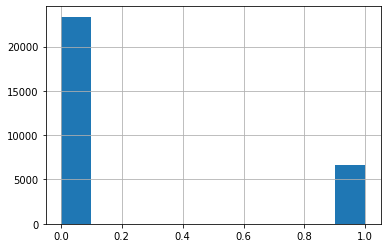

In [5]:
h1_sk_svm.explore(data)

In [6]:
prepared_data = h1_sk_svm.prep(data)

INFO:app.ai.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [7]:
h1_sk_svm.train(prepared_data)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [8]:
h1_sk_svm.evaluate(prepared_data)
h1_sk_svm.metrics

{'accuracy': 0.8143434343434344}

In [9]:
h1_sk_svm.persist('sk_svm_default_classifier')

2021-02-01 18:00:39,179 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2021-02-01 18:00:39,181 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2021-02-01 18:00:39,183 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'sk_svm_default_classifier'

## Submodel_2 - Multi-Layer Perceptron (MLP)

In [10]:
h1_tf_mlp = TensorflowMLPClassifier()
data = h1_tf_mlp.load_data()
prepared_data = h1_tf_mlp.prep(data)

INFO:app.ai.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [11]:
h1_tf_mlp.train(prepared_data)

In [12]:
h1_tf_mlp.evaluate(prepared_data)
h1_tf_mlp.metrics

INFO:app.ai.models.tensorflow_mlp_classifier:(9900, 1), (9900, 1)


{'accuracy': 0.8138383838383838}

In [13]:
h1_tf_mlp.persist('tf_mlp_default_classifier')

2021-02-01 18:00:43,874 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2021-02-01 18:00:43,876 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2021-02-01 18:00:43,877 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'tf_mlp_default_classifier'

## H1ST StackEnsemble

In [14]:
rf_stack_ensemble = DefaultClassifierEnsemble(
    [SklearnSVMClassifier().load('sk_svm_default_classifier'), 
     TensorflowMLPClassifier().load('tf_mlp_default_classifier')],
    submodel_predict_input_key= 'X', 
    submodel_predict_output_key='predictions')

2021-02-01 18:00:43,950 INFO h1st.model_repository.model_repository: Loading version sk_svm_default_classifier ....
INFO:h1st.model_repository.model_repository:Loading version sk_svm_default_classifier ....
2021-02-01 18:00:43,985 INFO h1st.model_repository.model_repository: Loading version tf_mlp_default_classifier ....
INFO:h1st.model_repository.model_repository:Loading version tf_mlp_default_classifier ....


In [15]:
data = rf_stack_ensemble.load_data()
prepared_data = rf_stack_ensemble.prep(data)

INFO:app.ai.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [16]:
rf_stack_ensemble.train(prepared_data)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [17]:
rf_stack_ensemble.evaluate(
    prepared_data, metrics=['confusion_matrix', 'accuracy'])

In [18]:
rf_stack_ensemble.persist('default_classifier_ensemble')
rf_stack_ensemble = None

2021-02-01 18:01:11,944 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2021-02-01 18:01:11,945 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2021-02-01 18:01:11,947 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


# Compare the accuracy of Submodels and Ensemble

In [19]:
rf_stack_ensemble = DefaultClassifierEnsemble(
    [SklearnSVMClassifier().load('sk_svm_default_classifier'), 
     TensorflowMLPClassifier().load('tf_mlp_default_classifier')]).load('default_classifier_ensemble')

2021-02-01 18:01:12,063 INFO h1st.model_repository.model_repository: Loading version sk_svm_default_classifier ....
INFO:h1st.model_repository.model_repository:Loading version sk_svm_default_classifier ....
2021-02-01 18:01:12,098 INFO h1st.model_repository.model_repository: Loading version tf_mlp_default_classifier ....
INFO:h1st.model_repository.model_repository:Loading version tf_mlp_default_classifier ....
2021-02-01 18:01:12,109 INFO h1st.model_repository.model_repository: Loading version default_classifier_ensemble ....
INFO:h1st.model_repository.model_repository:Loading version default_classifier_ensemble ....


In [20]:
sk_svm_accuracy = h1_sk_svm.metrics['accuracy']
tf_fc_accuracy = h1_tf_mlp.metrics['accuracy']
ensemble_accuracy = rf_stack_ensemble.metrics['accuracy']

In [21]:
print('sk_svm_accuracy:', sk_svm_accuracy)
print('tf_fc_accuracy:', tf_fc_accuracy)
print('ensemble_accuracy:', ensemble_accuracy)
assert (ensemble_accuracy >= sk_svm_accuracy) & (ensemble_accuracy >= tf_fc_accuracy)

sk_svm_accuracy: 0.8143434343434344
tf_fc_accuracy: 0.8138383838383838
ensemble_accuracy: 0.8136363636363636


AssertionError: 

# Evalute Ensemble Workflow

In [ ]:
from app.ai.workflow import DefaultClassifierEnsembleWorkflow
from sklearn.metrics import accuracy_score

In [ ]:
default_classifier_ensemble_workflow = DefaultClassifierEnsembleWorkflow()

In [ ]:
pred = default_classifier_ensemble_workflow.predict({"X": prepared_data['X_test']})

In [ ]:
prepared_data['X_test'].shape

In [ ]:
metrics = accuracy_score(prepared_data['y_test'], pred['predictions'])
print("workflow accuracy:", metrics)